In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/DebalB/Python_public/blob/master/extract_image_content/extract_image_content.py

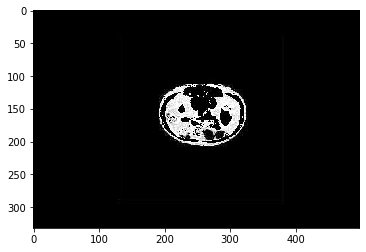

In [24]:
img = cv2.imread("thresh15.jpg")
clone = img.copy()
(H, W) = img.shape[:2]
img_centre_x = W//2
img_centre_y = H//2
plt.imshow(img)

(332, 498)

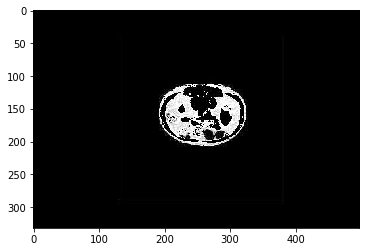

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

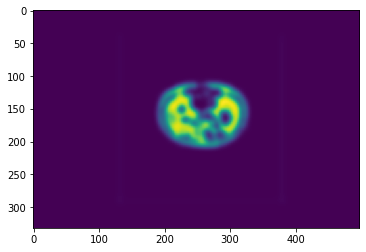

In [26]:
blurred1 = cv2.GaussianBlur(gray, (27, 27), 4)
plt.imshow(blurred1)

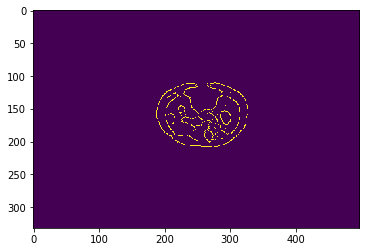

In [27]:
canny = cv2.Canny(blurred1, 45, 50)
plt.imshow(canny)

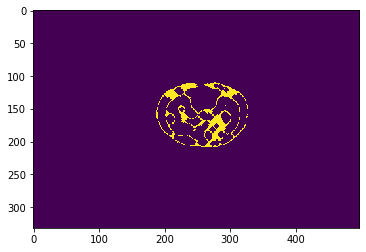

In [28]:
dilateSize = 3
#dilateSize = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilateSize,dilateSize))
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
canny_morphed = canny
canny_morphed  = cv2.dilate(canny_morphed,kernel,iterations=4)
#cv2.imshow("canny_morphed1", canny_morphed)
canny_morphed  = cv2.erode(canny_morphed,kernel,iterations=4)
plt.imshow(canny_morphed)

In [29]:
MIN_CONTOUR_AREA = 7000
RESIZE_IMAGE = False
DEBUG = False

In [30]:
import contour_lib
contours_list = contour_lib.get_contours(canny_morphed, min_contour_area=1500.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 297, area: 8322.5


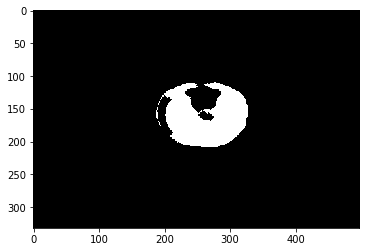

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 163, area: 2833.0


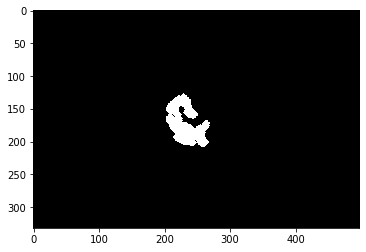

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 115, area: 1677.0


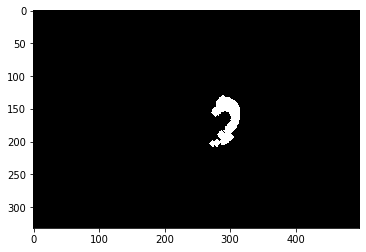

In [31]:
for c in contours_list:
    tmpAreaBlack = np.zeros(clone.shape)
    print("No of points in contour= {}, area: {}".format(len(c[0]), c[2]))
    cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)
    plt.imshow(tmpAreaBlack)
    plt.show()

No of points in contour= 1, area: 2833.0


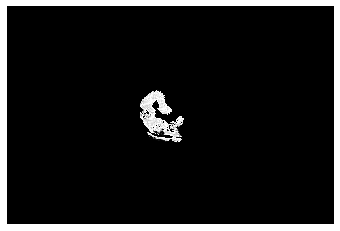

In [32]:
tmpAreaBlack = np.zeros(clone.shape)
c=contours_list[1]
print("No of points in contour= {}, area: {}".format(len([0]), c[2]))
cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)

mask = tmpAreaBlack[:,:,0].astype("uint8")
new_img_blk_bg = cv2.bitwise_and(clone, clone, mask=mask)
plt.imshow(new_img_blk_bg)
plt.axis("off")
#plt.savefig("VAT15.jpg")                  #Save the VAT segmented Image in you directory
plt.show()



## FULL FAT WHITE PIXEL COUNT

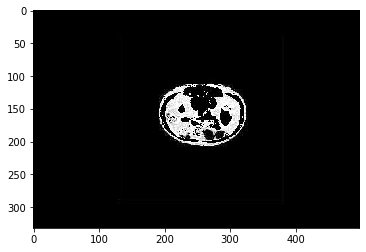

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("thresh15.jpg")
# #img1 = cv2.imread("TotalFATSegment.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(110,50,50), (130,255,255) )

plt.imshow(img)
# #cv2.imshow("orange", mask)
# #cv2.waitKey()
# #cv2.destroyAllWindows()

In [34]:
b, g, r = cv2.split(img)
wb = b == 255
wg = g == 255
wr = r == 255

In [35]:
white_pixels_if_true = np.bitwise_and(wb, np.bitwise_and(wg, wr))


In [36]:
img_size = r.size
white_pixels_count = np.sum(white_pixels_if_true)
white_area_ratio = white_pixels_count / img_size

In [37]:
white_area_ratio

0.00914501379010016

In [38]:
white_pixels_count

1512

## VAT WHITE PIXEL COUNT

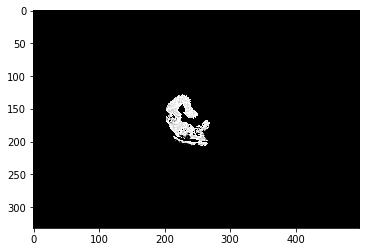

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#img1 = cv2.imread("VAT1.jpg")
#img = cv2.imread(new_img_blk_bg)
hsv = cv2.cvtColor(new_img_blk_bg, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(21, 10, 15), (30, 255, 255) )
#plt.ylim(350,0 )
plt.imshow(new_img_blk_bg)
#cv2.imshow("orange", mask)
#cv2.waitKey()
#cv2.destroyAllWindows()

In [40]:
b, g, r = cv2.split(new_img_blk_bg)
wb = b == 255
wg = g == 255
wr = r == 255

In [41]:
white_pixels_if_true2 = np.bitwise_and(wb, np.bitwise_and(wg, wr))


In [42]:
img_size = r.size
white_pixels_count2 = np.sum(white_pixels_if_true2)
white_area_ratio2 = white_pixels_count2 / img_size

In [43]:
white_area_ratio2

0.003314462669956936

In [44]:
white_pixels_count2

548

## VFI

In [45]:
ratio = float(white_pixels_count2/white_pixels_count)
ratio

0.36243386243386244